In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df = pd.read_csv(r"D:\ML course practise\dataset\logistic regression.csv") # Reading the Data
df.head()

,A,B,purchase
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1


In [9]:
df.describe()

,A,B,purchase
count,100.000000,100.000000,100.000000
mean,5.144230,4.866669,0.500000
std,2.103965,1.964860,0.502519
min,0.900800,1.169000,0.000000
25%,3.469150,3.418175,0.000000
50%,5.265700,4.927500,0.500000
75%,6.720625,6.466375,1.000000
max,8.922100,8.567600,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
A           100 non-null float64
B           100 non-null float64
purchase    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


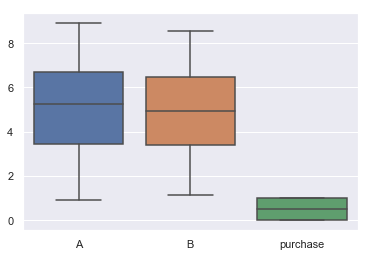

In [11]:
import seaborn as sns
sns.boxplot(data=df)

In [12]:
X = data.drop(columns = ['purchase'])
y = data['purchase']

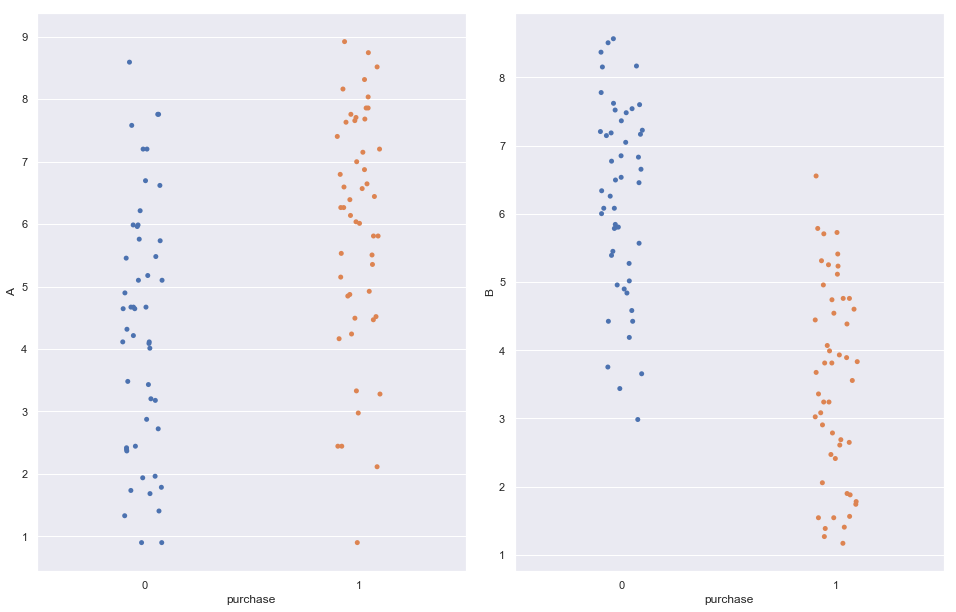

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

In [16]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)

In [18]:
y_pred = log_reg.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [21]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[14,  0],
       [ 0, 11]], dtype=int64)

In [22]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [23]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

1.0

In [24]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [25]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [26]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

1.0

In [27]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

1.0

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

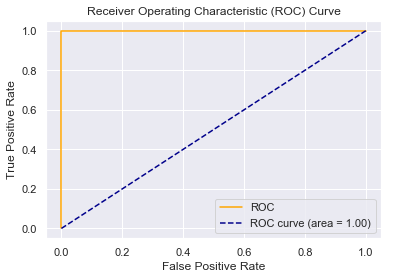

In [29]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()